<a href="https://colab.research.google.com/github/eunyeongkimm/personal_project/blob/main/commerce/%EC%98%A8%EB%9D%BC%EC%9D%B8_%EC%BB%A4%EB%A8%B8%EC%8A%A4%EB%AA%B0_%EA%B5%AC%EB%A7%A4_%ED%8C%A8%ED%84%B4_%EB%B6%84%EC%84%9D_%EB%B0%8F_RFM_%EB%B6%84%EC%84%9D_%EA%B8%B0%EB%B0%98_%EA%B3%A0%EA%B0%80%EC%B9%98%EA%B3%A0%EA%B0%9D_%EB%8F%84%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 가공 및 EDA

In [1]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 경로 설정
import os
os.chdir('/content/drive/MyDrive/5w_commerce')
os.getcwd()

'/content/drive/MyDrive/5w_commerce'

In [3]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#데이터 불러오기 - customer
df_customer = pd.read_csv('Customer.csv')
df_customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [5]:
df_transaction = pd.read_csv('Transactions.csv')
df_transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [6]:
df_category = pd.read_csv('prod_cat_info.csv')
df_category.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [7]:
#데이터 확인
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [8]:
#null값 대체 - gender
df_customer['Gender'] = df_customer['Gender'].fillna('unknown')

In [9]:
df_customer['Gender'].unique()

array(['M', 'F', 'unknown'], dtype=object)

In [10]:
#null값 대체 - city code
df_customer.groupby('city_code').count()['customer_Id'].sort_values(ascending = False)

city_code
3.0     595
5.0     586
4.0     582
7.0     575
2.0     564
8.0     562
10.0    558
1.0     551
9.0     546
6.0     526
Name: customer_Id, dtype: int64

In [11]:
df_customer['city_code'] = df_customer['city_code'].fillna(3.0)
df_customer['city_code'].unique()

array([ 4.,  8.,  2.,  1.,  5.,  9.,  7., 10.,  6.,  3.])

In [12]:
#DOB를 datetime형식으로 변경
df_customer['date_birth'] = pd.to_datetime(df_customer['DOB'], format = '%d-%m-%Y')

In [13]:
df_customer['date_birth']

0      1970-01-02
1      1970-01-07
2      1970-01-08
3      1970-01-10
4      1970-01-11
          ...    
5642   1992-12-19
5643   1992-12-24
5644   1992-12-25
5645   1992-12-27
5646   1992-12-29
Name: date_birth, Length: 5647, dtype: datetime64[ns]

In [14]:
df_customer.drop(columns = 'DOB', inplace = True)

In [15]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [16]:
#slah를 포함하는 데이터 확인
df_transaction[df_transaction['tran_date'].str.contains('/')]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
144,12323853707,273552,12/2/2014,12,6,4,510,214.200,2254.200,TeleShop
145,60596009595,274652,12/2/2014,12,5,4,183,76.860,808.860,MBR
146,17146707816,274897,12/2/2014,12,5,3,622,195.930,2061.930,MBR
147,36792372906,275246,12/2/2014,2,6,1,1185,124.425,1309.425,e-Shop
148,38821078489,267025,12/2/2014,10,6,4,933,391.860,4123.860,e-Shop
...,...,...,...,...,...,...,...,...,...,...
22907,80348907828,267124,1/2/2011,5,3,2,552,115.920,1219.920,TeleShop
22908,83849473598,269958,1/2/2011,12,5,3,403,126.945,1335.945,e-Shop
22909,95376486237,269403,1/2/2011,4,3,5,673,353.325,3718.325,MBR
22910,81365620177,274222,1/2/2011,3,2,3,373,117.495,1236.495,e-Shop


In [17]:
# / --> - 변경
df_transaction["tran_date"] = df_transaction["tran_date"].str.replace("/", "-")


In [18]:
#datetime 형식으로 변경
df_transaction['tran_date'] = pd.to_datetime(df_transaction['tran_date'], format = '%d-%m-%Y')

In [19]:
#3행이 각각 음수인 행의 비율과 3행이 모두 음수인 행의 비율이 같은 것으로 보아, qty가 음수이면 rate, total_amount도 음수로 계산된 것으로 보임
print('Qty 음수 행 비율 :', len(df_transaction[df_transaction['Qty'] < 0]) / len(df_transaction) )
print('Rate 음수 행 비율 :', len(df_transaction[df_transaction['Rate'] < 0]) / len(df_transaction) )
print('total_amt 음수 행 비율 :', len(df_transaction[df_transaction['total_amt'] < 0]) / len(df_transaction) )
print('\n')
print('3컬럼 모두 음수 행 비율 :', len(df_transaction[((df_transaction['Qty'] < 0)) & (df_transaction['Rate'] < 0) & (df_transaction['total_amt'] < 0)]) / len(df_transaction) )

Qty 음수 행 비율 : 0.09443456383117164
Rate 음수 행 비율 : 0.09443456383117164
total_amt 음수 행 비율 : 0.09443456383117164


3컬럼 모두 음수 행 비율 : 0.09443456383117164


In [20]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [21]:
#결측치 최종 확인
print(df_customer.isnull().sum().sum())
print(df_transaction.isnull().sum().sum())
print(df_category.isnull().sum().sum())

0
0
0


## 성별/연령구간별 고객 수

In [22]:
#2011년 기준 나이 계산
df_customer['age'] = 2011- df_customer['date_birth'].dt.year

In [23]:
sorted(df_customer['age'].unique())

[19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41]

In [24]:
#연령을 5간격으로 그룹화
df_customer['age_group'] = pd.cut(df_customer['age'], bins=range(19,45,5), right = False)

In [25]:
df_customer['age_group'].unique()

[[39, 44), [34, 39), [29, 34), [24, 29), [19, 24)]
Categories (5, interval[int64, left]): [[19, 24) < [24, 29) < [29, 34) < [34, 39) < [39, 44)]

In [26]:
df_customer_gender_age = df_customer.groupby(['Gender', 'age_group']).count()['customer_Id']
df_customer_gender_age = df_customer_gender_age[df_customer_gender_age.index.get_level_values('Gender') != 'unknown']

In [27]:
df_customer_gender_age

Gender  age_group
F       [19, 24)     622
        [24, 29)     591
        [29, 34)     593
        [34, 39)     600
        [39, 44)     347
M       [19, 24)     627
        [24, 29)     615
        [29, 34)     656
        [34, 39)     622
        [39, 44)     372
Name: customer_Id, dtype: int64

Text(0.5, 1.0, 'Customer Count by Age Group and Gender')

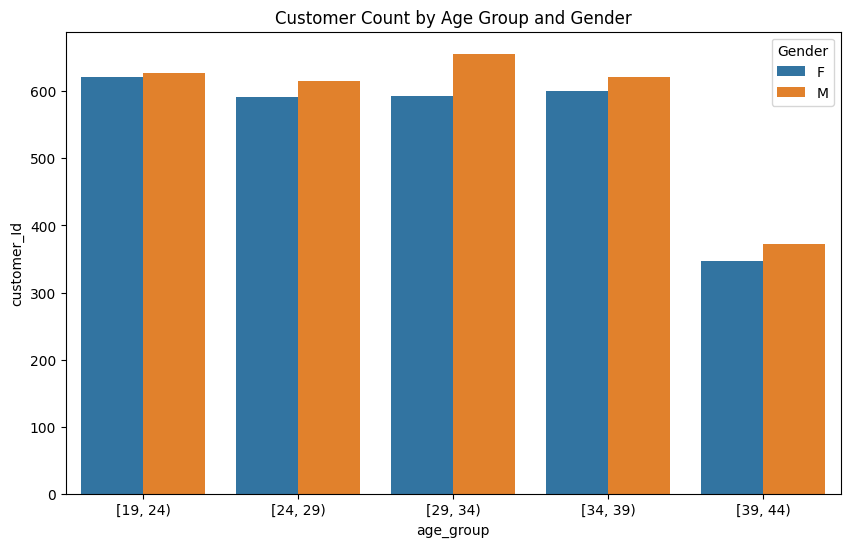

In [28]:
#reset_index()를 통해 multi index 해제 후 시각화

plt.figure(figsize = (10, 6))
sns.barplot(data=df_customer_gender_age.reset_index(), x='age_group', y='customer_Id', hue='Gender')
plt.title('Customer Count by Age Group and Gender')


## 구매경과일수 및 구매주기

- 구매 경과일수 = 기준일 - 마지막 구매일
- 구매주기 = (마지막 구매일 - 첫 구매일)/(총 구매 일수 - 1)


In [29]:
#2013-02-28 이후의 구매 데이터 삭제
df_transaction_1302 = df_transaction[df_transaction['tran_date'] <= '2013-02-28']

In [30]:
# 각 고객의 마지막 구매일 계산
last_purchase_date = df_transaction_1302.groupby('cust_id')['tran_date'].max()
last_purchase_date

cust_id
266783   2013-02-20
266784   2012-12-04
266785   2013-02-13
266788   2013-02-12
266794   2012-11-27
            ...    
275257   2013-02-26
275261   2011-10-05
275262   2012-02-29
275264   2011-10-08
275265   2011-12-26
Name: tran_date, Length: 5189, dtype: datetime64[ns]

In [31]:
# 각 고객의 첫 구매일 계산
first_purchase_date = df_transaction_1302.groupby('cust_id')['tran_date'].min()
first_purchase_date

cust_id
266783   2011-09-23
266784   2012-08-23
266785   2011-03-15
266788   2011-06-12
266794   2011-03-18
            ...    
275257   2011-12-05
275261   2011-09-26
275262   2011-08-13
275264   2011-08-05
275265   2011-12-17
Name: tran_date, Length: 5189, dtype: datetime64[ns]

In [32]:
#각 고객의 구매 경과일수 계산
purchase_elapsed_days = (pd.to_datetime('2013-02-28') - last_purchase_date).dt.days
purchase_elapsed_days

cust_id
266783      8
266784     86
266785     15
266788     16
266794     93
         ... 
275257      2
275261    512
275262    365
275264    509
275265    430
Name: tran_date, Length: 5189, dtype: int64

In [33]:
# 각 고객의 총 구매 일수 계산
total_purchase_days = df_transaction_1302.groupby('cust_id')['tran_date'].count()
total_purchase_days

cust_id
266783    5
266784    3
266785    7
266788    4
266794    9
         ..
275257    3
275261    2
275262    2
275264    2
275265    2
Name: tran_date, Length: 5189, dtype: int64

In [34]:
#df_transaction_1302[df_transaction_1302['cust_id'] == 266794].sort_values(by = 'tran_date')

In [35]:
#구매주기 계산
purchase_frequency = (last_purchase_date - first_purchase_date) / (total_purchase_days - 1)
purchase_frequency = purchase_frequency.dt.days
purchase_frequency

cust_id
266783    129.0
266784     51.0
266785    116.0
266788    203.0
266794     77.0
          ...  
275257    224.0
275261      9.0
275262    200.0
275264     64.0
275265      9.0
Name: tran_date, Length: 5189, dtype: float64

In [36]:
# 결과를 데이터프레임으로 합치기
df_purchase = pd.DataFrame({
    'customer_Id': last_purchase_date.index,
    'last_purchase_date': last_purchase_date,
    'first_purchase_date': first_purchase_date,
    'total_purchase_days': total_purchase_days,
    'purchase_elapsed_days': purchase_elapsed_days, #구매경과일수
    'purchase_frequency': purchase_frequency #구매주기
}).reset_index()

df_purchase.drop(columns = 'customer_Id', inplace = True)
df_purchase

,cust_id,last_purchase_date,first_purchase_date,total_purchase_days,purchase_elapsed_days,purchase_frequency
0,266783,2013-02-20,2011-09-23,5,8,129.0
1,266784,2012-12-04,2012-08-23,3,86,51.0
2,266785,2013-02-13,2011-03-15,7,15,116.0
3,266788,2013-02-12,2011-06-12,4,16,203.0
4,266794,2012-11-27,2011-03-18,9,93,77.0
...,...,...,...,...,...,...
5184,275257,2013-02-26,2011-12-05,3,2,224.0
5185,275261,2011-10-05,2011-09-26,2,512,9.0
5186,275262,2012-02-29,2011-08-13,2,365,200.0
5187,275264,2011-10-08,2011-08-05,2,509,64.0


## 고객 특성별 구매경과일수/구매주기 차이 확인(t-test,anova)

In [37]:
df_customer_purchase = pd.merge(df_purchase, df_customer, left_on='cust_id', right_on = 'customer_Id', how='left')
df_customer_purchase

,cust_id,last_purchase_date,first_purchase_date,total_purchase_days,purchase_elapsed_days,purchase_frequency,customer_Id,Gender,city_code,date_birth,age,age_group
0,266783,2013-02-20,2011-09-23,5,8,129.0,266783,M,4.0,1974-05-01,37,"[34, 39)"
1,266784,2012-12-04,2012-08-23,3,86,51.0,266784,F,10.0,1991-12-13,20,"[19, 24)"
2,266785,2013-02-13,2011-03-15,7,15,116.0,266785,F,3.0,1985-06-29,26,"[24, 29)"
3,266788,2013-02-12,2011-06-12,4,16,203.0,266788,F,2.0,1972-03-20,39,"[39, 44)"
4,266794,2012-11-27,2011-03-18,9,93,77.0,266794,F,9.0,1971-02-28,40,"[39, 44)"
...,...,...,...,...,...,...,...,...,...,...,...,...
5184,275257,2013-02-26,2011-12-05,3,2,224.0,275257,M,5.0,1987-10-25,24,"[24, 29)"
5185,275261,2011-10-05,2011-09-26,2,512,9.0,275261,F,10.0,1973-03-21,38,"[34, 39)"
5186,275262,2012-02-29,2011-08-13,2,365,200.0,275262,M,10.0,1973-06-06,38,"[34, 39)"
5187,275264,2011-10-08,2011-08-05,2,509,64.0,275264,M,4.0,1991-10-24,20,"[19, 24)"


In [38]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [39]:
#성별(unknown 제외)에 대한 구매경과일수(purchase_elapsed_days) 유의적 차이 검증 --> t-test

#두 그룹으로 분리
group1 = df_customer_purchase[df_customer_purchase['Gender'] == 'M']['purchase_elapsed_days']
group2 = df_customer_purchase[df_customer_purchase['Gender'] == 'F']['purchase_elapsed_days']

#t-test
t_statistic, p_value = ttest_ind(group1, group2)

print('p_value : ', p_value)

p_value :  0.8917929237071918


In [40]:
#성별(unknown 제외)에 대한 구매주기(purchase_frequency) 유의적 차이 검증 --> t-test
#purchase_frequency의 경우 총 구매일수가 1인 경우 분모가 0이되어 NaN이 됨. NaN의 경우 t-test불가하므로, NaN인 행 제외하고 분석

df_customer_purchase[df_customer_purchase['purchase_frequency'].isnull()]

,cust_id,last_purchase_date,first_purchase_date,total_purchase_days,purchase_elapsed_days,purchase_frequency,customer_Id,Gender,city_code,date_birth,age,age_group
5,266799,2012-03-11,2012-03-11,1,354,NaN,266799,F,5.0,1970-03-16,41,"[39, 44)"
6,266803,2012-06-02,2012-06-02,1,271,NaN,266803,F,1.0,1988-06-23,23,"[19, 24)"
17,266819,2011-05-02,2011-05-02,1,668,NaN,266819,M,8.0,1982-07-22,29,"[29, 34)"
25,266829,2011-03-06,2011-03-06,1,725,NaN,266829,F,4.0,1976-06-25,35,"[34, 39)"
27,266831,2011-03-09,2011-03-09,1,722,NaN,266831,M,6.0,1978-10-08,33,"[29, 34)"
...,...,...,...,...,...,...,...,...,...,...,...,...
5155,275214,2012-01-10,2012-01-10,1,415,NaN,275214,M,9.0,1984-06-04,27,"[24, 29)"
5167,275230,2012-04-02,2012-04-02,1,332,NaN,275230,F,3.0,1990-06-28,21,"[19, 24)"
5169,275232,2012-02-01,2012-02-01,1,393,NaN,275232,M,10.0,1972-01-27,39,"[39, 44)"
5174,275242,2011-08-07,2011-08-07,1,571,NaN,275242,F,10.0,1991-01-04,20,"[19, 24)"


In [41]:
#성별(unknown 제외)에 대한 구매주기(purchase_frequency) 유의적 차이 검증 --> t-test

#두 그룹으로 분리
group1 = df_customer_purchase[(df_customer_purchase['Gender'] == 'M') & df_customer_purchase['purchase_frequency'].notnull()]['purchase_frequency']
group2 = df_customer_purchase[(df_customer_purchase['Gender'] == 'F') & df_customer_purchase['purchase_frequency'].notnull()]['purchase_frequency']

# t-test
t_statistic, p_value = ttest_ind(group1, group2)

# p-value 출력
print('p_value : ', p_value)


p_value :  0.8559700747665507


In [42]:
#연령구간에 대한 구매경과일수(purchase_elapsed_days) 유의적 차이 검증 --> anova


# age_group의 고유값 가져오기
unique_values = df_customer_purchase['age_group'].unique()

# 고유값마다 그룹을 만들고 해당 그룹에 속하는 데이터를 리스트에 저장
group_data = []
for value in unique_values:
    group_data.append(df_customer_purchase[df_customer_purchase['age_group'] == value]['purchase_elapsed_days'])

# ANOVA 분석
f_statistic, p_value = f_oneway(*group_data)

# p-value 출력
print("p-value:", p_value)



p-value: 0.45286479254625434


In [43]:
#연령구간에 대한 구매주기(purchase_frequency) 유의적 차이 검증 --> anova


# age_group의 고유값 가져오기
unique_values = df_customer_purchase['age_group'].unique()

# 고유값마다 그룹을 만들고 해당 그룹에 속하는 데이터를 리스트에 저장
group_data = []
for value in unique_values:
    group_data.append(df_customer_purchase[df_customer_purchase['age_group'] == value]['purchase_frequency'].dropna())

# ANOVA 분석
f_statistic, p_value = f_oneway(*group_data)

# p-value 출력
print("p-value:", p_value)


p-value: 0.06067862893131186


<Axes: xlabel='age_group', ylabel='purchase_frequency'>

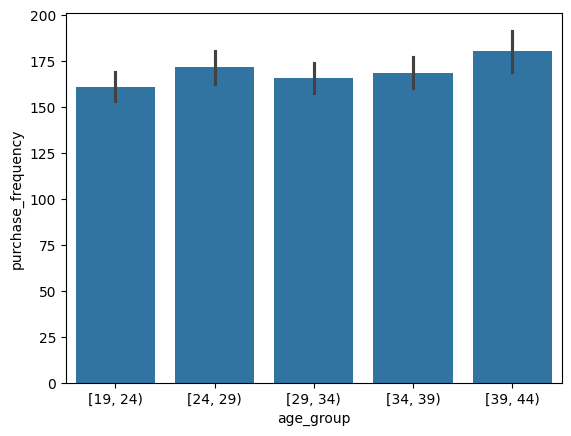

In [44]:
#age group별 구매주기가 유의적 차이가 없는 것으로 나타났으나, p-value == 0.06으로 의미가 있다고 보여져서 시각화
sns.barplot(data = df_customer_purchase[df_customer_purchase['purchase_frequency'].notnull()], x = 'age_group', y = 'purchase_frequency')

<Axes: xlabel='age', ylabel='purchase_frequency'>

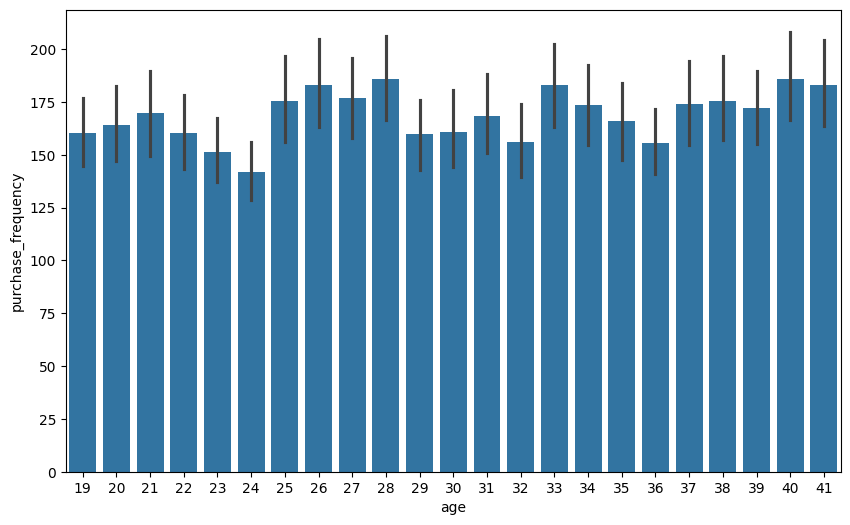

In [45]:
#특정 연령에 편중이 있는지 확인하기 위해 age별로도 확인
plt.figure(figsize = (10,6))
sns.barplot(data = df_customer_purchase[df_customer_purchase['purchase_frequency'].notnull()], x = 'age', y = 'purchase_frequency')

## 재구매 유도 캠페인 반응 고객 수 분석

- 구매 경과일수가 30일 이상인 고객을 대상으로 재구매 유도를 위한 캠페인을 진행
- 2013년 12월 31일까지 구매 반응한 고객 수를 구하기

In [46]:
#구매경과일수 30일 이상인 고객 추출
df_customer_deactive = df_customer_purchase[df_customer_purchase['purchase_elapsed_days'] >= 30]
df_customer_deactive

,cust_id,last_purchase_date,first_purchase_date,total_purchase_days,purchase_elapsed_days,purchase_frequency,customer_Id,Gender,city_code,date_birth,age,age_group
1,266784,2012-12-04,2012-08-23,3,86,51.0,266784,F,10.0,1991-12-13,20,"[19, 24)"
4,266794,2012-11-27,2011-03-18,9,93,77.0,266794,F,9.0,1971-02-28,40,"[39, 44)"
5,266799,2012-03-11,2012-03-11,1,354,NaN,266799,F,5.0,1970-03-16,41,"[39, 44)"
6,266803,2012-06-02,2012-06-02,1,271,NaN,266803,F,1.0,1988-06-23,23,"[19, 24)"
8,266807,2012-12-25,2011-10-27,4,65,141.0,266807,M,4.0,1988-09-13,23,"[19, 24)"
...,...,...,...,...,...,...,...,...,...,...,...,...
5183,275252,2012-10-25,2011-04-27,7,126,91.0,275252,M,6.0,1977-03-09,34,"[34, 39)"
5185,275261,2011-10-05,2011-09-26,2,512,9.0,275261,F,10.0,1973-03-21,38,"[34, 39)"
5186,275262,2012-02-29,2011-08-13,2,365,200.0,275262,M,10.0,1973-06-06,38,"[34, 39)"
5187,275264,2011-10-08,2011-08-05,2,509,64.0,275264,M,4.0,1991-10-24,20,"[19, 24)"


In [47]:
#2013-03-01~2013-12-31 구매이력 있는 사람 추출
df_transaction_1312 = df_transaction[(df_transaction['tran_date'] >= '2013-03-01') & (df_transaction['tran_date'] <= '2013-12-31')]
df_transaction_1312

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
1065,58387181112,275068,2013-12-31,8,3,5,792,415.800,4375.800,e-Shop
1066,21300411973,274568,2013-12-31,2,6,1,1054,110.670,1164.670,Flagship store
1067,25511948871,273541,2013-12-31,3,1,-3,-253,79.695,-838.695,MBR
1068,45524941068,268722,2013-12-31,10,5,5,124,65.100,685.100,Flagship store
1069,26100869804,273836,2013-12-31,9,3,3,843,265.545,2794.545,e-Shop
...,...,...,...,...,...,...,...,...,...,...
7361,76875398005,266846,2013-03-01,8,3,4,295,123.900,1303.900,TeleShop
7362,89172283224,271379,2013-03-01,9,3,-2,-1355,284.550,-2994.550,TeleShop
7363,79331206308,274601,2013-03-01,11,5,1,1019,106.995,1125.995,e-Shop
7364,70612957106,274566,2013-03-01,11,6,4,791,332.220,3496.220,Flagship store


In [48]:
#2013.02.28 기준 deactive 유저(4,675명)와 2013.03~2013.12 구매이력 있는 유저(중복 포함 6,301명)의 교집합 구하기 --> 중복 포함 5,230명
df_customer_react = pd.merge(df_customer_deactive, df_transaction_1312, left_on='cust_id', right_on = 'cust_id', how='inner')
df_customer_react

,cust_id,last_purchase_date,first_purchase_date,total_purchase_days,purchase_elapsed_days,purchase_frequency,customer_Id,Gender,city_code,date_birth,...,age_group,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,266794,2012-11-27,2011-03-18,9,93,77.0,266794,F,9.0,1971-02-28,...,"[39, 44)",42435707527,2013-06-30,10,3,-1,-123,12.915,-135.915,e-Shop
1,266794,2012-11-27,2011-03-18,9,93,77.0,266794,F,9.0,1971-02-28,...,"[39, 44)",42435707527,2013-06-29,10,3,1,123,12.915,135.915,e-Shop
2,266799,2012-03-11,2012-03-11,1,354,NaN,266799,F,5.0,1970-03-16,...,"[39, 44)",26739409431,2013-09-24,10,5,2,203,42.630,448.630,e-Shop
3,266814,2012-11-01,2012-03-03,3,119,121.0,266814,F,9.0,1982-10-18,...,"[29, 34)",13652552115,2013-03-16,12,6,5,1250,656.250,6906.250,MBR
4,266814,2012-11-01,2012-03-03,3,119,121.0,266814,F,9.0,1982-10-18,...,"[29, 34)",17159028497,2013-03-06,1,4,1,955,100.275,1055.275,Flagship store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5225,275252,2012-10-25,2011-04-27,7,126,91.0,275252,M,6.0,1977-03-09,...,"[34, 39)",29045976742,2013-05-25,4,2,5,1171,614.775,6469.775,Flagship store
5226,275261,2011-10-05,2011-09-26,2,512,9.0,275261,F,10.0,1973-03-21,...,"[34, 39)",81880568368,2013-10-05,11,5,5,80,42.000,442.000,MBR
5227,275261,2011-10-05,2011-09-26,2,512,9.0,275261,F,10.0,1973-03-21,...,"[34, 39)",45067329959,2013-07-05,3,5,-3,-862,271.530,-2857.530,e-Shop
5228,275261,2011-10-05,2011-09-26,2,512,9.0,275261,F,10.0,1973-03-21,...,"[34, 39)",45067329959,2013-06-27,3,5,3,862,271.530,2857.530,e-Shop


In [49]:
#중복 제거시 2,977명

df_customer_react_distinct = df_customer_react.drop_duplicates(subset=['cust_id'])
df_customer_react_distinct

,cust_id,last_purchase_date,first_purchase_date,total_purchase_days,purchase_elapsed_days,purchase_frequency,customer_Id,Gender,city_code,date_birth,...,age_group,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,266794,2012-11-27,2011-03-18,9,93,77.0,266794,F,9.0,1971-02-28,...,"[39, 44)",42435707527,2013-06-30,10,3,-1,-123,12.915,-135.915,e-Shop
2,266799,2012-03-11,2012-03-11,1,354,NaN,266799,F,5.0,1970-03-16,...,"[39, 44)",26739409431,2013-09-24,10,5,2,203,42.630,448.630,e-Shop
3,266814,2012-11-01,2012-03-03,3,119,121.0,266814,F,9.0,1982-10-18,...,"[29, 34)",13652552115,2013-03-16,12,6,5,1250,656.250,6906.250,MBR
5,266815,2012-11-22,2012-01-04,2,98,323.0,266815,F,4.0,1973-08-07,...,"[34, 39)",86296762989,2013-07-02,10,3,3,739,232.785,2449.785,TeleShop
6,266816,2012-02-21,2011-04-17,3,373,155.0,266816,M,6.0,1974-11-15,...,"[34, 39)",88316484015,2013-08-12,1,2,-1,-74,7.770,-81.770,e-Shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216,275247,2012-02-14,2012-02-12,2,380,2.0,275247,F,4.0,1984-10-19,...,"[24, 29)",41406844924,2013-09-25,4,2,3,346,108.990,1146.990,Flagship store
5218,275249,2012-05-05,2011-05-04,2,299,367.0,275249,M,2.0,1982-07-20,...,"[29, 34)",11279517942,2013-06-05,6,5,-1,-603,63.315,-666.315,Flagship store
5221,275252,2012-10-25,2011-04-27,7,126,91.0,275252,M,6.0,1977-03-09,...,"[34, 39)",65419382652,2013-12-24,1,4,1,833,87.465,920.465,TeleShop
5226,275261,2011-10-05,2011-09-26,2,512,9.0,275261,F,10.0,1973-03-21,...,"[34, 39)",81880568368,2013-10-05,11,5,5,80,42.000,442.000,MBR


In [50]:
#가장 반응을 많이한 고객은? 고객별 반응횟수 분포는?
df_customer_react_count = df_customer_react.groupby('cust_id').count()['Gender'].sort_values(ascending = False)
df_customer_react_count

cust_id
270458    8
272252    7
270030    7
273740    7
268706    6
         ..
270376    1
270365    1
270362    1
270357    1
275265    1
Name: Gender, Length: 2977, dtype: int64

In [51]:
df_customer_react_count = pd.DataFrame(df_customer_react_count).reset_index()

In [52]:
df_customer_react_count = df_customer_react_count.rename(columns = {'Gender' : 'react_count'})

<Axes: xlabel='react_count', ylabel='Density'>

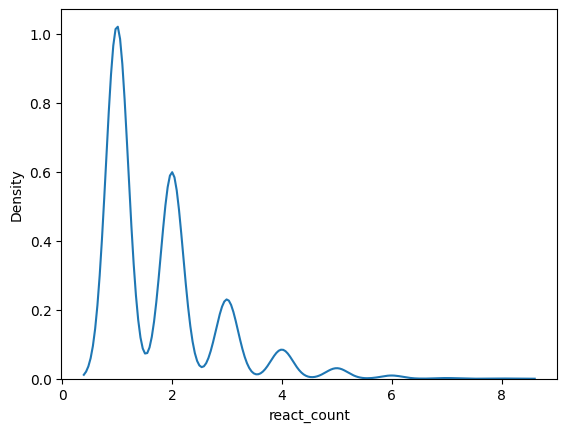

In [53]:
sns.kdeplot(data = df_customer_react_count, x = 'react_count')

<Axes: xlabel='tran_date', ylabel='cust_id'>

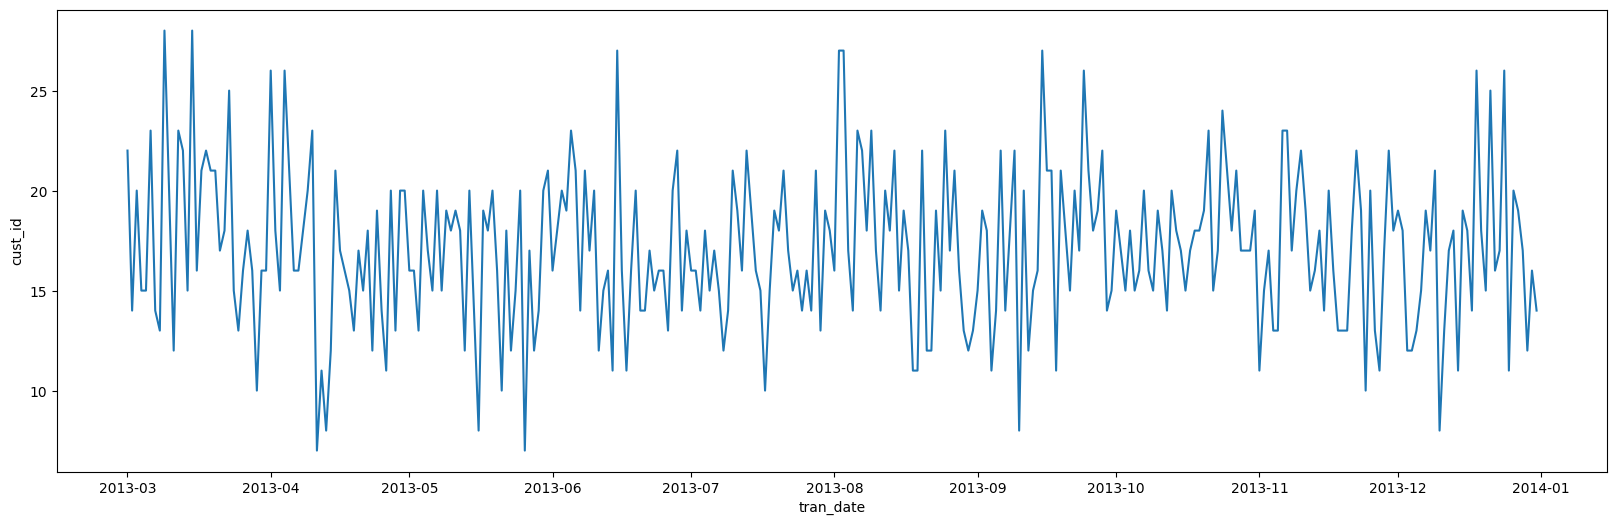

In [54]:
#날짜별 반응 고객 수
df_customer_date_react_count = df_customer_react.groupby('tran_date').count()['cust_id'].sort_values(ascending = False)
df_customer_date_react_count = pd.DataFrame(df_customer_date_react_count).reset_index()

plt.figure(figsize = (20,6))
sns.lineplot(data = df_customer_date_react_count, x = 'tran_date', y = 'cust_id')

## 요일별 구매 패턴 분석
* 월요일부터 금요일까지 순차적으로 증가하다가, 토요일에 급격히 감소한 후 일요일에 약간 회복되는 양상을 보이고 있음

In [55]:
# 요일 컬럼 생성(dt.day_name)
df_transaction['weekday'] = df_transaction['tran_date'].dt.day_name()
df_transaction

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,weekday
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Friday
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Thursday
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Monday
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Monday
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Tuesday
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Tuesday
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Tuesday
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Tuesday


In [56]:
df_transaction_weekday = df_transaction.groupby('weekday').count()['cust_id']
df_transaction_weekday = pd.DataFrame(df_transaction_weekday).reset_index()

df_transaction_weekday

,weekday,cust_id
0,Friday,3361
1,Monday,3219
2,Saturday,3258
3,Sunday,3326
4,Thursday,3318
5,Tuesday,3269
6,Wednesday,3302


In [57]:
#요일 순으로 정렬
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_dtype = pd.CategoricalDtype(categories=weekday_order, ordered=True)

df_transaction_weekday['weekday'] = df_transaction_weekday['weekday'].astype(weekday_dtype)

df_transaction_weekday = df_transaction_weekday.sort_values(by = 'weekday')
df_transaction_weekday

,weekday,cust_id
1,Monday,3219
5,Tuesday,3269
6,Wednesday,3302
4,Thursday,3318
0,Friday,3361
2,Saturday,3258
3,Sunday,3326


<Axes: xlabel='weekday', ylabel='cust_id'>

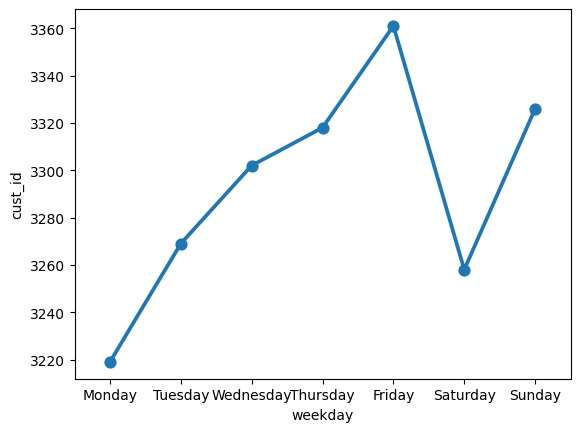

In [58]:
sns.pointplot(data = df_transaction_weekday, x = 'weekday', y = 'cust_id')

## 카테고리별 월평균 매출액 분석
* 2011년부터 2013년까지 전자기기의 월평균 매출액이 가장 높은 것으로 나타났다.

In [59]:
#yyyy-mm 컬럼 생성
df_transaction['tran_year_month'] = df_transaction['tran_date'].dt.to_period('M')
df_transaction

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,weekday,tran_year_month
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Friday,2014-02
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Thursday,2014-02
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Monday,2014-02
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Monday,2014-02
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Sunday,2014-02
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Tuesday,2011-01
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Tuesday,2011-01
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Tuesday,2011-01
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Tuesday,2011-01


In [60]:
#df_category의 컬럼명을 변경하여 컬럼 명칭을 통일한 후, join하여 카테고리 명칭 불러오기
df_category = df_category.rename(columns = {'prod_sub_cat_code' : 'prod_subcat_code'})
df_transaction_cat = pd.merge(df_transaction, df_category, on = ['prod_cat_code', 'prod_subcat_code'], how = 'left')

In [61]:
#df_transaction_cat.to_excel('transaction_cat.xlsx', index = False)

In [62]:
df_transaction_cat_36 = df_transaction_cat[(df_transaction_cat['tran_year_month'] >= '2011-01') & (df_transaction_cat['tran_year_month'] <= '2013-12')]
df_transaction_cat_36

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,weekday,tran_year_month,prod_cat,prod_subcat
1065,58387181112,275068,2013-12-31,8,3,5,792,415.800,4375.800,e-Shop,Tuesday,2013-12,Electronics,Personal Appliances
1066,21300411973,274568,2013-12-31,2,6,1,1054,110.670,1164.670,Flagship store,Tuesday,2013-12,Home and kitchen,Furnishing
1067,25511948871,273541,2013-12-31,3,1,-3,-253,79.695,-838.695,MBR,Tuesday,2013-12,Clothing,Kids
1068,45524941068,268722,2013-12-31,10,5,5,124,65.100,685.100,Flagship store,Tuesday,2013-12,Books,Non-Fiction
1069,26100869804,273836,2013-12-31,9,3,3,843,265.545,2794.545,e-Shop,Tuesday,2013-12,Electronics,Cameras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Tuesday,2011-01,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Tuesday,2011-01,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Tuesday,2011-01,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Tuesday,2011-01,Books,Children


In [63]:
#월 - 카테고리별 매출액 평균 집계 --> 이게 아님
#df_transaction_cat_month = df_transaction_cat_36.groupby(['prod_cat']).mean()['total_amt'].reset_index()
#df_transaction_cat_month = df_transaction_cat_month.rename(columns = {'total_amt' : 'mean'})
#df_transaction_cat_month

* 다른 방법으로 구해보기 (합계 먼저 계산한 후 평균 구하기)




In [64]:
df_transaction_cat_36.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
weekday                     object
tran_year_month          period[M]
prod_cat                    object
prod_subcat                 object
dtype: object

In [65]:
# 월별로 각 대 카테고리 기준 매출액 합계 구하기
df_temp = df_transaction_cat_36.groupby(['tran_year_month', 'prod_cat'])['total_amt'].sum().reset_index()
df_temp = df_temp.rename(columns={'total_amt': 'sum'})
df_temp

,tran_year_month,prod_cat,sum
0,2011-01,Bags,28925.585
1,2011-01,Books,111702.240
2,2011-01,Clothing,31618.470
3,2011-01,Electronics,69149.795
4,2011-01,Footwear,21522.085
...,...,...,...
211,2013-12,Books,323587.095
212,2013-12,Clothing,190212.490
213,2013-12,Electronics,261729.195
214,2013-12,Footwear,169232.960


In [66]:
# 평균 계산
df_transaction_cat_month = df_temp.groupby('prod_cat')['sum'].agg(['mean']).reset_index()
df_transaction_cat_month

,prod_cat,mean
0,Bags,109006.316250
1,Books,339932.009444
2,Clothing,164999.674306
3,Electronics,284476.325972
4,Footwear,165679.034444
5,Home and kitchen,223243.549028


## 카테고리별 월평균 매출 성과(변동계수)

In [67]:
#카테고리별 분산/표준편차 집계

df_transaction_cat_month_2 = df_temp.groupby('prod_cat')['sum'].agg(['mean', 'var', 'std']).reset_index()
df_transaction_cat_month_2

,prod_cat,mean,var,std
0,Bags,109006.316250,6.809566e+08,26095.146098
1,Books,339932.009444,3.021497e+09,54968.142749
2,Clothing,164999.674306,1.628353e+09,40352.858761
3,Electronics,284476.325972,2.608934e+09,51077.728034
4,Footwear,165679.034444,1.295008e+09,35986.220227
5,Home and kitchen,223243.549028,1.849927e+09,43010.781818


* 의류(clothings)의 변동계수가 1.26으로 가장 크게 나타났으며, 서적(books)의 변동계수가 0.16으로 가장 작게 나타났다.
* 즉, 의류의 매출이 가장 들쭉날쭉하며, 서적의 매출이 상대적으로 가장 일정하다.

In [68]:
df_transaction_cat_month_2['RSD'] =  df_transaction_cat_month_2['std'] / df_transaction_cat_month_2['mean']
df_transaction_cat_month_2

,prod_cat,mean,var,std,RSD
0,Bags,109006.316250,6.809566e+08,26095.146098,0.239391
1,Books,339932.009444,3.021497e+09,54968.142749,0.161703
2,Clothing,164999.674306,1.628353e+09,40352.858761,0.244563
3,Electronics,284476.325972,2.608934e+09,51077.728034,0.179550
4,Footwear,165679.034444,1.295008e+09,35986.220227,0.217204
5,Home and kitchen,223243.549028,1.849927e+09,43010.781818,0.192663


<Axes: xlabel='prod_cat', ylabel='RSD'>

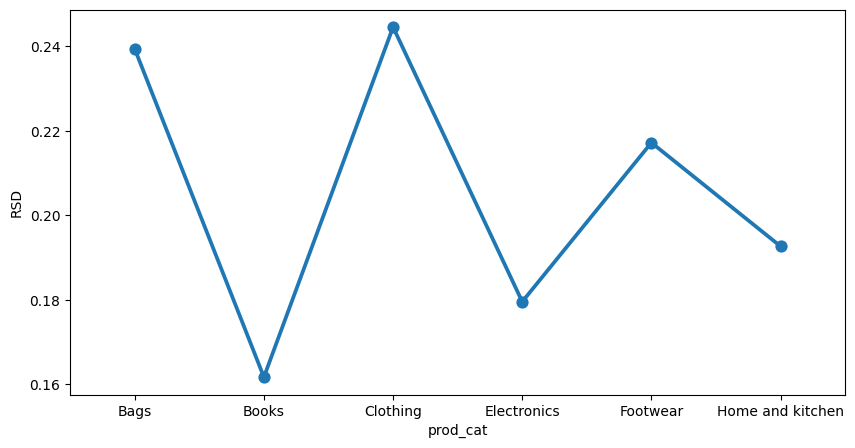

In [69]:
plt.figure(figsize = (10,5))
sns.pointplot(data = df_transaction_cat_month_2, x = 'prod_cat', y = 'RSD')

# 고객 관점에서 구매 활동성 증대 방안 : RFM분석 기반 고가치고객의 매출 증진 전략



## 고가치 고객 정의

In [70]:
#고객별 매출액 구하기
df_customer_monetary = df_transaction.groupby('cust_id')['total_amt'].sum().reset_index()
df_customer_monetary = df_customer_monetary.rename(columns = {'total_amt' : 'monetary'})

In [71]:
df_rfm_raw = pd.merge(df_customer_purchase, df_customer_monetary, on = 'cust_id')
df_rfm_raw

,cust_id,last_purchase_date,first_purchase_date,total_purchase_days,purchase_elapsed_days,purchase_frequency,customer_Id,Gender,city_code,date_birth,age,age_group,monetary
0,266783,2013-02-20,2011-09-23,5,8,129.0,266783,M,4.0,1974-05-01,37,"[34, 39)",3113.890
1,266784,2012-12-04,2012-08-23,3,86,51.0,266784,F,10.0,1991-12-13,20,"[19, 24)",5694.065
2,266785,2013-02-13,2011-03-15,7,15,116.0,266785,F,3.0,1985-06-29,26,"[24, 29)",21613.800
3,266788,2013-02-12,2011-06-12,4,16,203.0,266788,F,2.0,1972-03-20,39,"[39, 44)",6092.970
4,266794,2012-11-27,2011-03-18,9,93,77.0,266794,F,9.0,1971-02-28,40,"[39, 44)",27981.915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,275257,2013-02-26,2011-12-05,3,2,224.0,275257,M,5.0,1987-10-25,24,"[24, 29)",12574.900
5185,275261,2011-10-05,2011-09-26,2,512,9.0,275261,F,10.0,1973-03-21,38,"[34, 39)",442.000
5186,275262,2012-02-29,2011-08-13,2,365,200.0,275262,M,10.0,1973-06-06,38,"[34, 39)",5078.580
5187,275264,2011-10-08,2011-08-05,2,509,64.0,275264,M,4.0,1991-10-24,20,"[19, 24)",3815.565


In [72]:
df_rfm = df_rfm_raw[['cust_id', 'purchase_elapsed_days', 'purchase_frequency', 'monetary', 'Gender', 'city_code', 'age', 'age_group']]
df_rfm

,cust_id,purchase_elapsed_days,purchase_frequency,monetary,Gender,city_code,age,age_group
0,266783,8,129.0,3113.890,M,4.0,37,"[34, 39)"
1,266784,86,51.0,5694.065,F,10.0,20,"[19, 24)"
2,266785,15,116.0,21613.800,F,3.0,26,"[24, 29)"
3,266788,16,203.0,6092.970,F,2.0,39,"[39, 44)"
4,266794,93,77.0,27981.915,F,9.0,40,"[39, 44)"
...,...,...,...,...,...,...,...,...
5184,275257,2,224.0,12574.900,M,5.0,24,"[24, 29)"
5185,275261,512,9.0,442.000,F,10.0,38,"[34, 39)"
5186,275262,365,200.0,5078.580,M,10.0,38,"[34, 39)"
5187,275264,509,64.0,3815.565,M,4.0,20,"[19, 24)"


In [73]:

# Recency 점수 부여 (낮은 'purchase_elapsed_days' 값에 높은 점수 부여)
df_rfm['R_Score'] = pd.qcut(df_rfm['purchase_elapsed_days'], 5, labels=[5, 4, 3, 2, 1])

# Frequency 점수 부여 (높은 'purchase_frequency' 값에 높은 점수 부여)
df_rfm['F_Score'] = pd.qcut(df_rfm['purchase_frequency'], 5, labels=[1, 2, 3, 4, 5])

# Monetary 점수 부여 (높은 'monetary' 값에 높은 점수 부여)
df_rfm['M_Score'] = pd.qcut(df_rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

# RFM 그룹 생성 (예: '555'은 최고 점수, '111'은 최저 점수)
df_rfm['RFM_Score'] = df_rfm['R_Score'].astype(str) + df_rfm['F_Score'].astype(str) + df_rfm['M_Score'].astype(str)

df_rfm

<ipython-input-73-3a40bb24b91f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['R_Score'] = pd.qcut(df_rfm['purchase_elapsed_days'], 5, labels=[5, 4, 3, 2, 1])
<ipython-input-73-3a40bb24b91f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['F_Score'] = pd.qcut(df_rfm['purchase_frequency'], 5, labels=[1, 2, 3, 4, 5])
<ipython-input-73-3a40bb24b91f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,cust_id,purchase_elapsed_days,purchase_frequency,monetary,Gender,city_code,age,age_group,R_Score,F_Score,M_Score,RFM_Score
0,266783,8,129.0,3113.890,M,4.0,37,"[34, 39)",5,3,1,531
1,266784,86,51.0,5694.065,F,10.0,20,"[19, 24)",4,1,2,412
2,266785,15,116.0,21613.800,F,3.0,26,"[24, 29)",5,2,5,525
3,266788,16,203.0,6092.970,F,2.0,39,"[39, 44)",5,4,2,542
4,266794,93,77.0,27981.915,F,9.0,40,"[39, 44)",4,2,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...
5184,275257,2,224.0,12574.900,M,5.0,24,"[24, 29)",5,4,4,544
5185,275261,512,9.0,442.000,F,10.0,38,"[34, 39)",1,1,1,111
5186,275262,365,200.0,5078.580,M,10.0,38,"[34, 39)",2,4,2,242
5187,275264,509,64.0,3815.565,M,4.0,20,"[19, 24)",1,1,1,111


In [74]:
df_rfm = df_rfm.sort_values(by = 'RFM_Score', ascending = False)

In [75]:
df_rfm['RFM_Score'].unique()

array(['5nan5', '5nan4', '5nan3', '5nan2', '5nan1', '555', '554', '553',
       '552', '551', '545', '544', '543', '542', '541', '535', '534',
       '533', '532', '531', '525', '524', '523', '522', '521', '515',
       '514', '513', '512', '511', '4nan4', '4nan3', '4nan2', '4nan1',
       '455', '454', '453', '452', '451', '445', '444', '443', '442',
       '441', '435', '434', '433', '432', '431', '425', '424', '423',
       '422', '421', '415', '414', '413', '412', '411', '3nan5', '3nan4',
       '3nan3', '3nan2', '3nan1', '355', '354', '353', '352', '351',
       '345', '344', '343', '342', '341', '335', '334', '333', '332',
       '331', '325', '324', '323', '322', '321', '315', '314', '313',
       '312', '311', '2nan5', '2nan4', '2nan3', '2nan2', '2nan1', '255',
       '254', '253', '252', '251', '245', '244', '243', '242', '241',
       '235', '234', '233', '232', '231', '225', '224', '223', '222',
       '221', '215', '214', '213', '212', '211', '1nan5', '1nan4',
       '1nan3

In [76]:
# 'RFM_Score'에 'nan'이 포함되지 않은 행들만 선택
df_rfm = df_rfm[~df_rfm['RFM_Score'].str.contains('nan')]

<Axes: xlabel='RFM_Score', ylabel='count'>

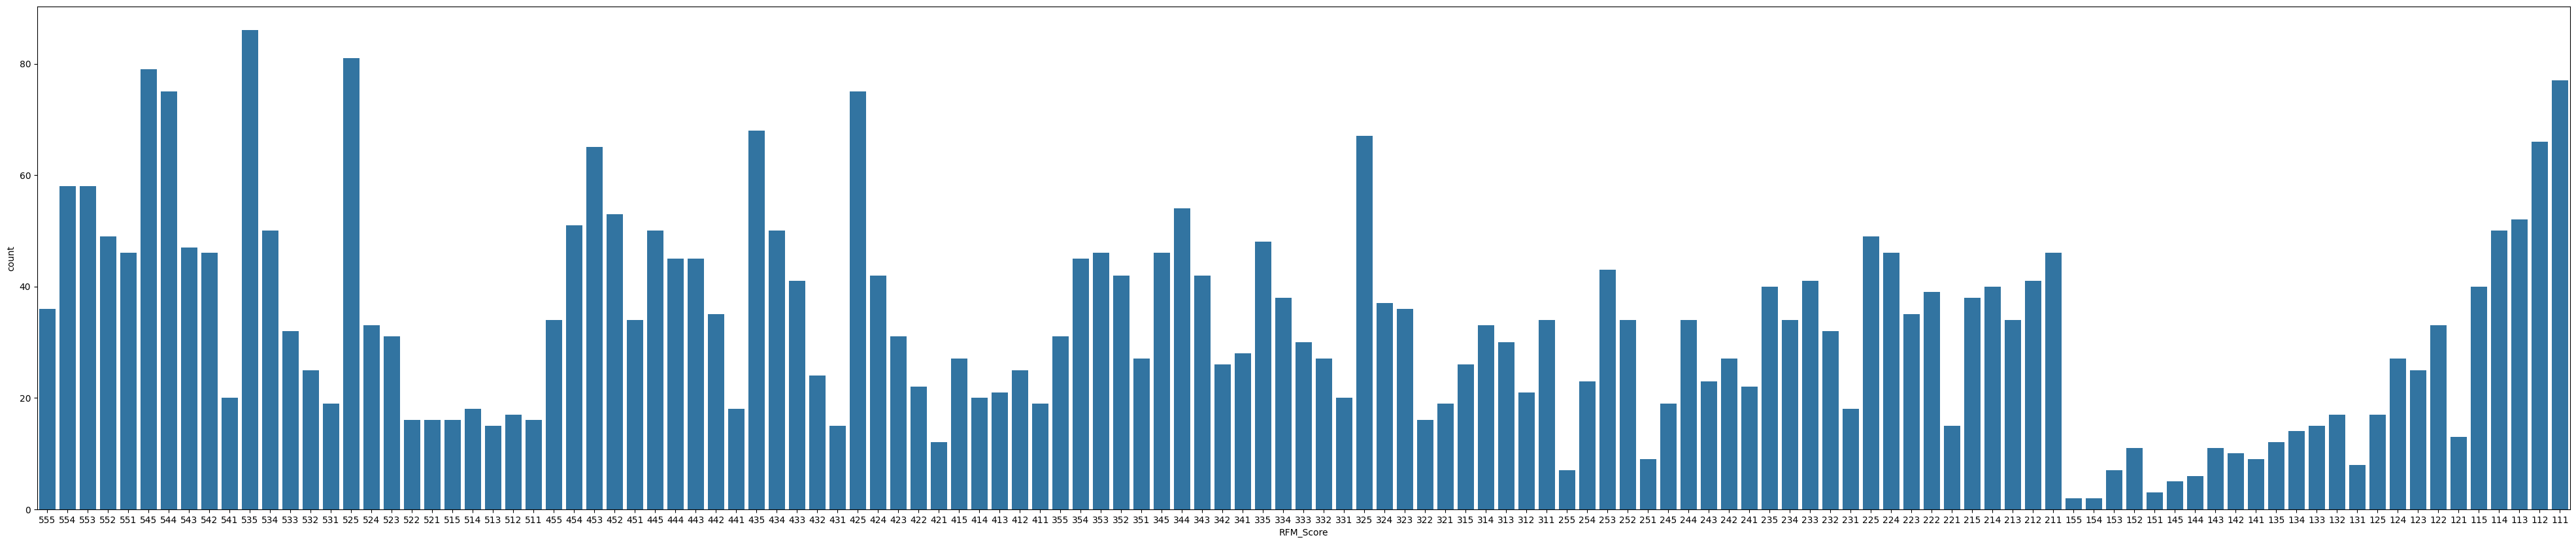

In [77]:
plt.figure(figsize = (50,10))
sns.countplot(data = df_rfm, x = 'RFM_Score')

In [78]:
# 세그먼트별 평균 RFM 값 계산
segment_stats = df_rfm.groupby('RFM_Score').agg({
    'purchase_frequency': 'mean',
    'monetary': ['mean', 'count'],
    'purchase_elapsed_days': 'mean'
}).reset_index()

segment_stats.columns = ['RFM_Score', 'Customer_Count', 'Average_Recency', 'Average_Frequency', 'Average_Monetary']
segment_stats


,RFM_Score,Customer_Count,Average_Recency,Average_Frequency,Average_Monetary
0,111,22.675325,1576.045714,77,568.350649
1,112,35.969697,5339.041894,66,552.621212
2,113,44.615385,7998.308750,52,542.769231
3,114,40.200000,11799.698300,50,533.060000
4,115,42.000000,17043.354250,40,558.525000
...,...,...,...,...,...
120,551,442.978261,2569.509348,46,29.804348
121,552,411.612245,5377.155510,49,32.163265
122,553,403.241379,8388.493190,58,32.810345
123,554,374.620690,11727.536466,58,32.379310


In [79]:
#최근성, 구매 빈도, 금액 모두에서 높은 점수를 받은 555 고객을 추출
df_rfm_555 = df_rfm[df_rfm['RFM_Score'] == '555']
df_rfm_555_cust_id = df_rfm[df_rfm['RFM_Score'] == '555']['cust_id']
df_rfm_555

,cust_id,purchase_elapsed_days,purchase_frequency,monetary,Gender,city_code,age,age_group,R_Score,F_Score,M_Score,RFM_Score
3677,272809,28,307.0,15611.440,M,7.0,38,"[34, 39)",5,5,5,555
2863,271479,37,284.0,25870.260,F,6.0,27,"[24, 29)",5,5,5,555
3042,271771,24,328.0,14163.890,M,10.0,21,"[19, 24)",5,5,5,555
514,267643,37,296.0,15790.450,M,3.0,34,"[34, 39)",5,5,5,555
708,267965,41,260.0,16081.065,M,6.0,28,"[24, 29)",5,5,5,555
2651,271139,5,272.0,17036.890,M,2.0,37,"[34, 39)",5,5,5,555
4709,274510,45,353.0,14020.240,F,6.0,33,"[29, 34)",5,5,5,555
4873,274780,27,280.0,17287.725,M,6.0,38,"[34, 39)",5,5,5,555
4136,273553,3,262.0,17949.620,M,3.0,38,"[34, 39)",5,5,5,555
3498,272520,33,488.0,14310.855,M,5.0,35,"[34, 39)",5,5,5,555


## 고가치고객의 인구통계학적 특성 분석
* RFM 점수가 555인 고객을 고가치 고객으로 정의한다.
* 고가치 고객은 2.0, 5.0 지역에 많이 분포하고 있으므로, 이 지역에 오프라인몰 추가 투자를 계획해볼 수 있다.
* 고가치 고객은 34세 이상 39세 미만의 연령대에 많이 분포하고 있으므로, 해당 연령대를 타겟팅한 프로모션 혹은 프리미엄 제품 출시를 계획해볼 수 있다.
* 고가치 고객의 성별은 남성, 여성 각각 18명씩 존재하는 것으로 나타났다.

<Axes: xlabel='city_code', ylabel='count'>

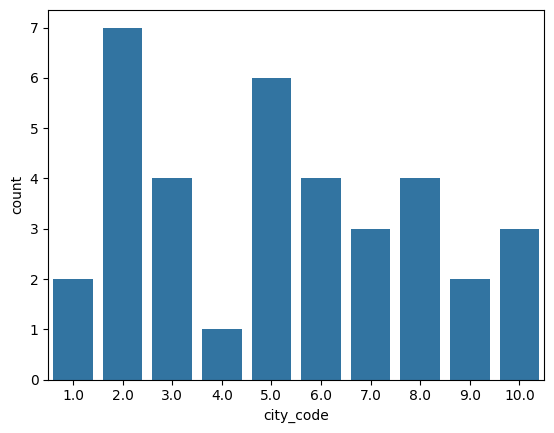

In [80]:
sns.countplot(data = df_rfm_555, x = 'city_code')

<Axes: xlabel='age_group', ylabel='count'>

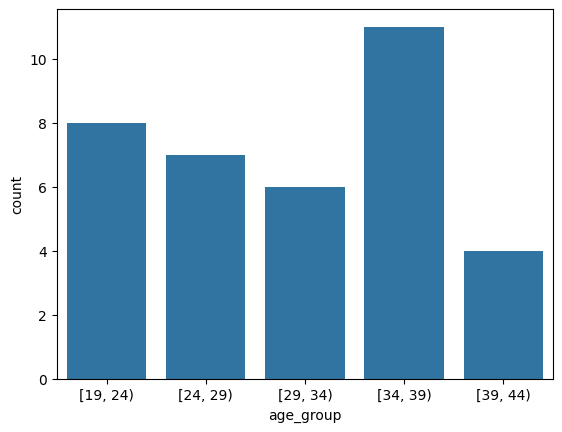

In [81]:
sns.countplot(data = df_rfm_555, x = 'age_group')

<Axes: xlabel='Gender', ylabel='count'>

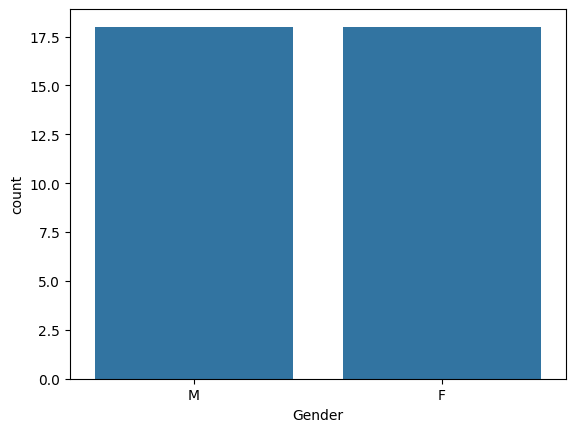

In [82]:
sns.countplot(data = df_rfm_555, x = 'Gender')

In [83]:
df_rfm_555.groupby('Gender').count()['cust_id']

Gender
F    18
M    18
Name: cust_id, dtype: int64

## 고가치 고객이 선호하는 제품/카테고리 분석 및 구매 증대 방안
* 고가치 고객 그룹과 아닌 그룹의 구매 횟수당 매출액의 차이가 가장 큰 카테고리는 리빙용품 및 주방용품(Home And Kitchen)으로 나타났다.
* 이는 고가치 고객의 주 연령층인 34~39세에 결혼/독립 등 생애주기의 변화를 맞으면서 리빙용품 및 주방용품의 구매가 늘어나는 것으로 보인다.

 (출처 : https://www.koit.co.kr/news/articleView.html?idxno=114598)
* 고가치 고객의 리빙용품 및 주방용품 매출액은 2011, 2013, 2014년의 경우 2~3월 전후로 가장 높았다.

  (2012년 2~3월은 구매가 없었던 것으로 보이는데, 해당 부분에 대한 추가 분석이 필요하다.)
* 그러므로, 매년 2~3월 해당 연령층을 타겟팅하여 신혼부부/1인가구를 위한 프로모션 등을 계획하여 고객 충성도를 높일 수 있다.

In [84]:
#고가치그룹 여부 구분 컬럼을 추가하여 아닌 그룹과의 차이 비교
rfm_555_cust_id = df_rfm_555['cust_id'].tolist()
df_transaction_cat['High_Value_Customer'] = df_transaction_cat['cust_id'].apply(lambda x: 'Yes' if x in rfm_555_cust_id else 'No')


In [85]:
df_transaction_cat['High_Value_Customer'].unique()

array(['No', 'Yes'], dtype=object)

In [86]:
df_transaction_cat

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,weekday,tran_year_month,prod_cat,prod_subcat,High_Value_Customer
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Friday,2014-02,Clothing,Women,No
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Thursday,2014-02,Electronics,Computers,No
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Monday,2014-02,Books,DIY,No
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Monday,2014-02,Home and kitchen,Bath,No
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Sunday,2014-02,Books,DIY,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Tuesday,2011-01,Books,Academic,No
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Tuesday,2011-01,Clothing,Mens,No
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Tuesday,2011-01,Home and kitchen,Furnishing,No
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Tuesday,2011-01,Books,Children,No


In [87]:
# 고객별 총 구매액 및 구매 횟수 계산
customer_sales = df_transaction_cat.groupby(['High_Value_Customer', 'cust_id']).agg(
    total_sales=('total_amt', 'sum'),
    purchase_count=('cust_id', 'count')
).reset_index()

# 고가치 고객 여부별 총 구매액 및 총 구매 횟수 계산
total_sales_and_purchases = customer_sales.groupby('High_Value_Customer').agg(
    total_sales=('total_sales', 'sum'),
    total_purchases=('purchase_count', 'sum')
).reset_index()

# 1구매당 평균 구매액 계산
total_sales_and_purchases['avg_sales_per_purchase'] = total_sales_and_purchases['total_sales'] / total_sales_and_purchases['total_purchases']

# 결과 출력
total_sales_and_purchases



,High_Value_Customer,total_sales,total_purchases,avg_sales_per_purchase
0,No,4.796436e+07,22888,2095.611499
1,Yes,6.154154e+05,165,3729.790212


<Axes: xlabel='High_Value_Customer', ylabel='avg_sales_per_purchase'>

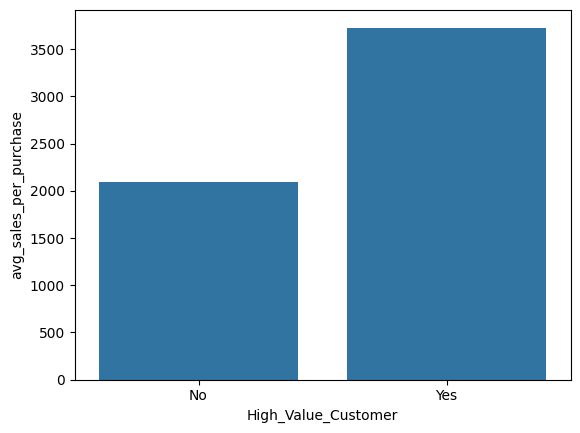

In [88]:
sns.barplot(data = total_sales_and_purchases, x = 'High_Value_Customer', y = 'avg_sales_per_purchase')

In [89]:
# 카테고리별, 고가치 고객 여부별 총 구매액 및 구매 횟수 계산
category_sales = df_transaction_cat.groupby(['prod_cat', 'High_Value_Customer']).agg(
    total_sales=('total_amt', 'sum'),
    purchase_count=('cust_id', 'count')
).reset_index()

# 1구매당 평균 구매액 계산
category_sales['avg_sales_per_purchase'] = category_sales['total_sales'] / category_sales['purchase_count']

# 결과 출력
category_sales


,prod_cat,High_Value_Customer,total_sales,purchase_count,avg_sales_per_purchase
0,Bags,No,4.078319e+06,1984,2055.604098
1,Bags,Yes,4.639011e+04,14,3313.579286
2,Books,No,1.269063e+07,6030,2104.582817
3,Books,Yes,1.320597e+05,39,3386.145000
4,Clothing,No,6.145362e+06,2936,2093.107108
5,Clothing,Yes,1.057750e+05,24,4407.292500
6,Electronics,No,1.060107e+07,4860,2181.290236
7,Electronics,Yes,1.213931e+05,38,3194.555000
8,Footwear,No,6.107598e+06,2971,2055.738132
9,Footwear,Yes,1.121763e+05,28,4006.295893


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Bags'),
  Text(1, 0, 'Books'),
  Text(2, 0, 'Clothing'),
  Text(3, 0, 'Electronics'),
  Text(4, 0, 'Footwear'),
  Text(5, 0, 'Home and kitchen')])

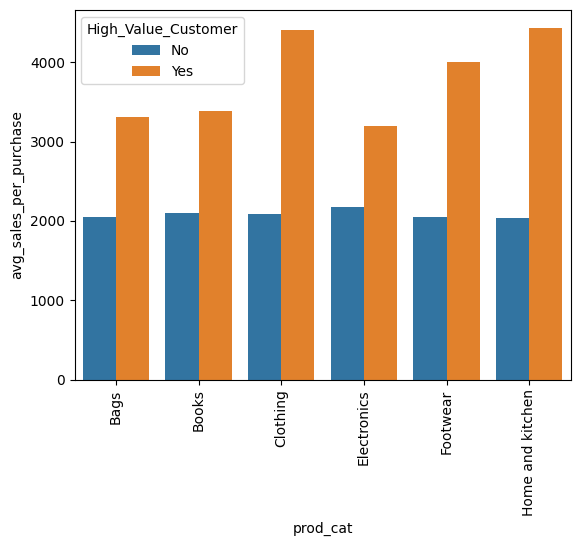

In [90]:
#카테고리별 구매횟수당 구매액 분석
sns.barplot(data = category_sales, x = 'prod_cat', y = 'avg_sales_per_purchase', hue = 'High_Value_Customer')
plt.xticks(rotation = 90)

In [91]:

pivot_category_sales = category_sales.pivot(index='prod_cat', columns='High_Value_Customer', values='avg_sales_per_purchase')

# 고가치 고객('Yes')과 그렇지 않은 고객('No')의 평균 구매액 차이 계산
pivot_category_sales['diff'] = pivot_category_sales['Yes'] - pivot_category_sales['No']

pivot_category_sales.sort_values(by = 'diff', ascending = False)

High_Value_Customer,No,Yes,diff
prod_cat,,,
Home and kitchen,2031.013408,4437.328409,2406.315001
Clothing,2093.107108,4407.292500,2314.185392
Footwear,2055.738132,4006.295893,1950.557761
Books,2104.582817,3386.145000,1281.562183
Bags,2055.604098,3313.579286,1257.975188
Electronics,2181.290236,3194.555000,1013.264764


<ipython-input-92-94836eebd14e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = df_transaction_cat[df_transaction_cat['prod_cat']=='Home and kitchen'], x = 'tran_date', y = 'total_amt', hue = 'High_Value_Customer', ci = None, marker = 'o')


<Axes: xlabel='tran_date', ylabel='total_amt'>

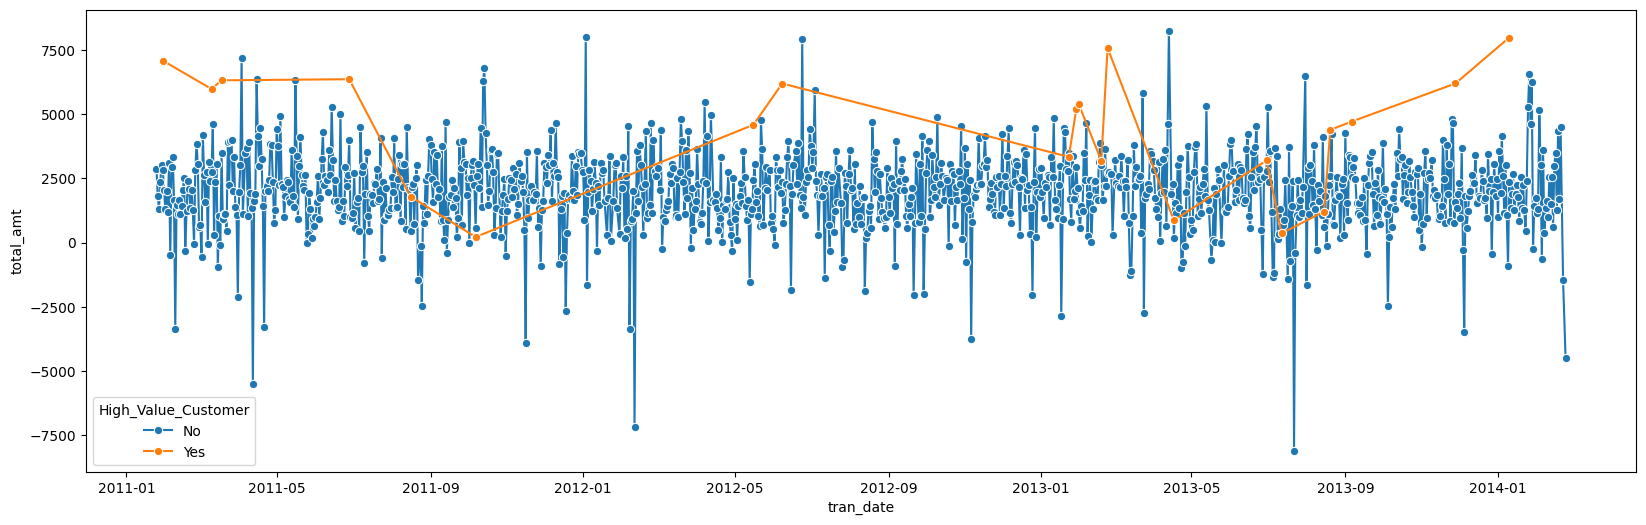

In [92]:
#Home and kitchen 월별 구매 경향성 분석
plt.figure(figsize = (20,6))
sns.lineplot(data = df_transaction_cat[df_transaction_cat['prod_cat']=='Home and kitchen'], x = 'tran_date', y = 'total_amt', hue = 'High_Value_Customer', ci = None, marker = 'o')